<a href="https://colab.research.google.com/github/JeanMusenga/PhD-Thesis_2024_Musenga/blob/main/Classifiers_with_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important and helpful sources
https://www.youtube.com/watch?v=P47raNuzAW0
https://github.com/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb


In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
import gensim
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split

In [64]:
np.random.seed(42) #The random seed helps in the reproduction of the results

In [7]:
dataset=pd.read_excel('posts.xlsx')

In [8]:
dataset.shape

(14932, 2)

In [ ]:
dataset['Label']

In [ ]:
dataset.head()

# Tokenization

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)
print("-----------------------------------------------")

import string
punctuations = string.punctuation
print(punctuations)

{'formerly', 'although', 'the', 'who', 'call', 'by', 'please', 'less', 'anywhere', 'that', 'not', 'something', 'ten', 'somehow', '’ll', 'front', 'serious', 'many', 'their', 'might', 'bottom', 'used', 'first', 'so', 'together', 'whole', 'hers', '‘re', 'put', 'herself', 'for', 'yourself', 'afterwards', 'none', 'wherever', 'itself', 'whatever', 'give', 'with', 'thus', 'myself', 'seeming', 'latter', 'thru', 'n‘t', 'how', 'either', 'did', 'hundred', 'i', 'thereafter', 'other', 'such', 'above', '‘s', 'these', 'towards', 'she', 'several', 'out', 'its', 'why', 'ours', 'just', 'throughout', 'ever', 'becoming', 'anything', '’re', 'but', 'become', 'had', 'go', 'through', 'still', 'while', 'becomes', 'next', 'can', 'thence', 'hereafter', "n't", 'twenty', 'upon', 'wherein', 'amount', 'around', 'themselves', 'ourselves', 'what', 'may', '‘ll', 'am', 'alone', 'forty', 'made', 'cannot', 'your', 'really', 'moreover', 'see', 'last', 'own', 'whoever', 'be', "'ll", 'get', 'twelve', 'never', 'a', 'he', 'tho

In [12]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [13]:
dataset['Tokens'] = dataset['Question_body'].apply(spacy_tokenizer)

In [14]:
dataset.head()

,Question_body,Label,Tokens
0,Here's the architecture:\n<ol>\n<li>Input comp...,1,"[architecture, ol, li, input, component, recei..."
1,I am confused about the architecture of Razor ...,1,"[confused, architecture, razor, pages, asp.net..."
2,I have some spring boot microservices and I wa...,1,"[spring, boot, microservice, want, use, micros..."
3,I'm trying to properly design an application a...,1,"[try, properly, design, application, accord, c..."
4,I heard that for .NET8 Microsoft gifted us wit...,1,"[hear, .net8, microsoft, gift, totally, quot;f..."


# Feature Vectors Engineering

In [15]:
import gensim.downloader as api #importing word embeddings
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [17]:
#since I downloaded and saved this model before, no need to download it again
#pretrained = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [23]:
#https://chatgpt.com/share/c637a12f-2688-4388-8bc4-d972b664d4f3

# Create directory if it doesn't exist
import os
os.makedirs('/content/drive/MyDrive/', exist_ok=True)

# Save the model to Google Drive
pretrained.save("/contentdrive/MyDrive/word2vec-google-news-300.model")

In [ ]:
#https://chatgpt.com/share/c637a12f-2688-4388-8bc4-d972b664d4f3
from gensim.models import Word2Vec

# Load the model from Google Drive
model = Word2Vec.load("/content/drive/MyDrive/word2vec-google-news-300.model")

In [24]:
def sent_vec(sent):
    vector_size = pretrained.vector_size
    pretrained_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in pretrained:
            ctr += 1
            pretrained_res += pretrained[w]
    pretrained_res = pretrained_res/ctr
    return pretrained_res

In [25]:
dataset['W2V_Vect'] = dataset['Tokens'].apply(sent_vec)

In [26]:
dataset.head()

,Question_body,Label,Tokens,W2V_Vect
0,Here's the architecture:\n<ol>\n<li>Input comp...,1,"[architecture, ol, li, input, component, recei...","[0.042191066099016857, -0.03547005171186469, -..."
1,I am confused about the architecture of Razor ...,1,"[confused, architecture, razor, pages, asp.net...","[0.020880169338650174, 0.029664357503255207, 0..."
2,I have some spring boot microservices and I wa...,1,"[spring, boot, microservice, want, use, micros...","[0.011846774961890244, 0.0009713521817835366, ..."
3,I'm trying to properly design an application a...,1,"[try, properly, design, application, accord, c...","[0.046028193721064814, -0.027165794372558595, ..."
4,I heard that for .NET8 Microsoft gifted us wit...,1,"[hear, .net8, microsoft, gift, totally, quot;f...","[0.06962245343679405, -0.020223778414439005, -..."


In [27]:
x = dataset['W2V_Vect'].to_list()
y = dataset['Label'].to_list()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=125)

# Naive Bayes with Word2vect

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [30]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)


In [62]:
y_pred = nb_model.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0, FN_0 = conf_matrix[0, 0], conf_matrix[0, 1]
FP_0, TN_0 = conf_matrix[1, 0], conf_matrix[1, 1]

TP_1, FN_1 = conf_matrix[1, 1], conf_matrix[1, 0]
FP_1, TN_1 = conf_matrix[0, 1], conf_matrix[0, 0]

# Calculate accuracy for each class
accuracy_class_0 = (TP_0 + TN_0) / (TP_0 + TN_0 + FP_0 + FN_0)
accuracy_class_1 = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

print(f'Overall Accuracy: {overall_accuracy}')

print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, Accuracy: {accuracy_class_0}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, Accuracy: {accuracy_class_1}, F1-score: {f1_class[1]}, Support: {support_class[1]}')


Overall Accuracy: 0.7790425175761634
Class 0 - Precision: 0.8271698113207547, Recall: 0.7177472167648985, Accuracy: 0.7790425175761634, F1-score: 0.7685834502103787, Support: 1527
Class 1 - Precision: 0.7406738868832732, Recall: 0.8431506849315068, Accuracy: 0.7790425175761634, F1-score: 0.7885970531710442, Support: 1460


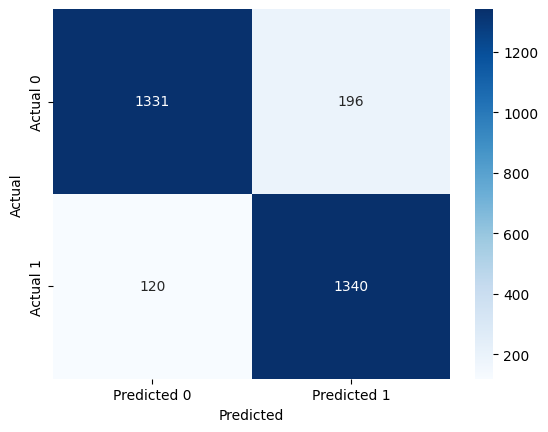

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN with Word2vect

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
#y_pred = knn_model.predict(X_test)
#print(classification_report(y_test, y_pred))

In [61]:
y_pred = knn_model.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0, FN_0 = conf_matrix[0, 0], conf_matrix[0, 1]
FP_0, TN_0 = conf_matrix[1, 0], conf_matrix[1, 1]

TP_1, FN_1 = conf_matrix[1, 1], conf_matrix[1, 0]
FP_1, TN_1 = conf_matrix[0, 1], conf_matrix[0, 0]

# Calculate accuracy for each class
accuracy_class_0 = (TP_0 + TN_0) / (TP_0 + TN_0 + FP_0 + FN_0)
accuracy_class_1 = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

print(f'Overall Accuracy: {overall_accuracy}')

print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, Accuracy: {accuracy_class_0}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, Accuracy: {accuracy_class_1}, F1-score: {f1_class[1]}, Support: {support_class[1]}')


Overall Accuracy: 0.8175426849681955
Class 0 - Precision: 0.8697289156626506, Recall: 0.756385068762279, Accuracy: 0.8175426849681955, F1-score: 0.8091068301225919, Support: 1527
Class 1 - Precision: 0.7757685352622061, Recall: 0.8815068493150685, Accuracy: 0.8175426849681955, F1-score: 0.8252645078550817, Support: 1460


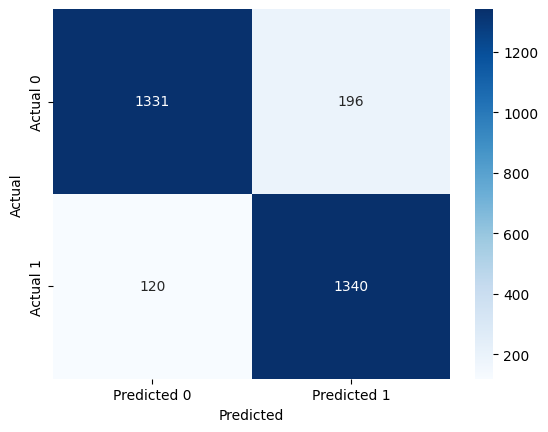

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression with Word2vect

In [36]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train, y_train)

In [37]:

#print(classification_report(y_test, y_pred))

In [60]:
y_pred = lg_model.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0, FN_0 = conf_matrix[0, 0], conf_matrix[0, 1]
FP_0, TN_0 = conf_matrix[1, 0], conf_matrix[1, 1]

TP_1, FN_1 = conf_matrix[1, 1], conf_matrix[1, 0]
FP_1, TN_1 = conf_matrix[0, 1], conf_matrix[0, 0]

# Calculate accuracy for each class
accuracy_class_0 = (TP_0 + TN_0) / (TP_0 + TN_0 + FP_0 + FN_0)
accuracy_class_1 = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

print(f'Overall Accuracy: {overall_accuracy}')

print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, Accuracy: {accuracy_class_0}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, Accuracy: {accuracy_class_1}, F1-score: {f1_class[1]}, Support: {support_class[1]}')



Overall Accuracy: 0.8885169065952461
Class 0 - Precision: 0.9111570247933884, Recall: 0.8664047151277013, Accuracy: 0.8885169065952461, F1-score: 0.8882175226586103, Support: 1527
Class 1 - Precision: 0.867100977198697, Recall: 0.9116438356164384, Accuracy: 0.8885169065952461, F1-score: 0.8888146911519199, Support: 1460


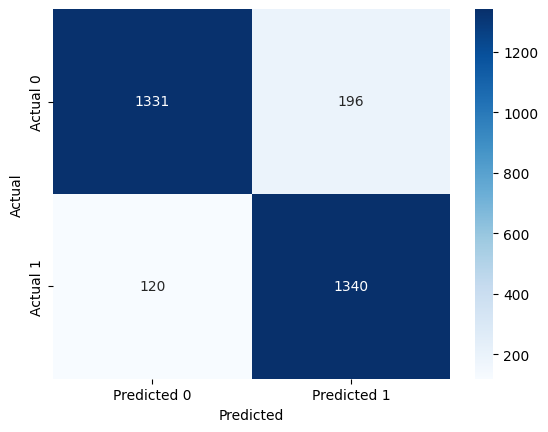

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree with Word2vect

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)

In [ ]:

#print(classification_report(y_test, y_pred))

In [59]:
y_pred = dt_model.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0, FN_0 = conf_matrix[0, 0], conf_matrix[0, 1]
FP_0, TN_0 = conf_matrix[1, 0], conf_matrix[1, 1]

TP_1, FN_1 = conf_matrix[1, 1], conf_matrix[1, 0]
FP_1, TN_1 = conf_matrix[0, 1], conf_matrix[0, 0]

# Calculate accuracy for each class
accuracy_class_0 = (TP_0 + TN_0) / (TP_0 + TN_0 + FP_0 + FN_0)
accuracy_class_1 = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

print(f'Overall Accuracy: {overall_accuracy}')

print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, Accuracy: {accuracy_class_0}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, Accuracy: {accuracy_class_1}, F1-score: {f1_class[1]}, Support: {support_class[1]}')


Overall Accuracy: 0.7412119183126883
Class 0 - Precision: 0.7490092470277411, Recall: 0.7426326129666012, Accuracy: 0.7412119183126883, F1-score: 0.7458073002301874, Support: 1527
Class 1 - Precision: 0.7331975560081466, Recall: 0.7397260273972602, Accuracy: 0.7412119183126883, F1-score: 0.7364473235594953, Support: 1460


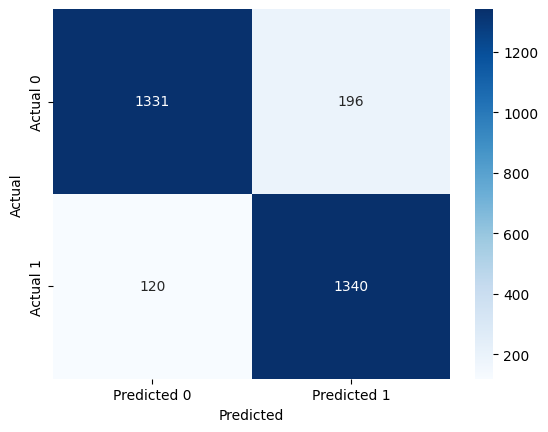

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM with Word2vect

In [41]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [42]:

#print(classification_report(y_test, y_pred))

In [54]:
y_pred = svm_model.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0, FN_0 = conf_matrix[0, 0], conf_matrix[0, 1]
FP_0, TN_0 = conf_matrix[1, 0], conf_matrix[1, 1]

TP_1, FN_1 = conf_matrix[1, 1], conf_matrix[1, 0]
FP_1, TN_1 = conf_matrix[0, 1], conf_matrix[0, 0]

# Calculate accuracy for each class
accuracy_class_0 = (TP_0 + TN_0) / (TP_0 + TN_0 + FP_0 + FN_0)
accuracy_class_1 = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

print(f'Overall Accuracy: {overall_accuracy}')

print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, Accuracy: {accuracy_class_0}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, Accuracy: {accuracy_class_1}, F1-score: {f1_class[1]}, Support: {support_class[1]}')


Overall Accuracy: 0.8942082356879812
Class 0 - Precision: 0.9172984148862853, Recall: 0.8716437459070072, Accuracy: 0.8942082356879812, F1-score: 0.8938885157824044, Support: 1527
Class 1 - Precision: 0.8723958333333334, Recall: 0.9178082191780822, Accuracy: 0.8942082356879812, F1-score: 0.8945260347129507, Support: 1460


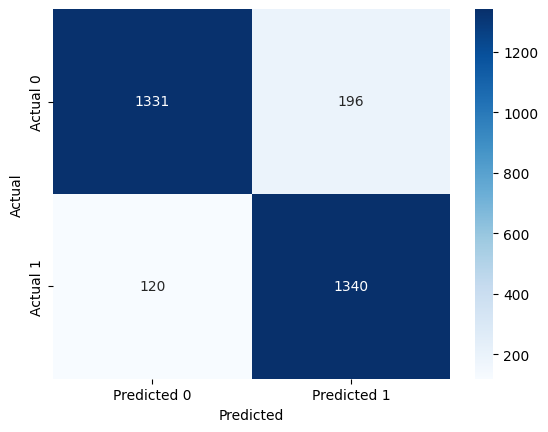

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()